In [8]:
%matplotlib notebook

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [4]:
series.shape

(10000, 51, 1)

In [5]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [6]:
X_valid[:, -1].shape

(2000, 1)

In [7]:
X_valid.shape

(2000, 50, 1)

In [9]:
# Let's first set a baseline
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

# Now let's create a linear regression model to see if we can improve the result
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
             optimizer='adam')
history = model.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   epochs=20)

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.1004 - val_loss: 0.0559
Epoch 2/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0386 - val_loss: 0.0269
Epoch 3/20
7000/7000 [==============================] - 0s 20us/sample - loss: 0.0205 - val_loss: 0.0162
Epoch 4/20
7000/7000 [==============================] - 0s 20us/sample - loss: 0.0133 - val_loss: 0.0118
Epoch 5/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 6/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
7000/7000 [==============================] - 0s 22us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 8/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0066 - val_loss: 0.0065
Epoch 1

In [17]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.004280659

Using a Linear Regression model we were able to improve the predictions.

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

# Let's try to use a RNN model. Let's implement a simple RNN.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',
             loss='mean_squared_error')
history = model.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   epochs=20)

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 2s 288us/sample - loss: 0.1816 - val_loss: 0.1587
Epoch 2/20
7000/7000 [==============================] - 2s 216us/sample - loss: 0.1459 - val_loss: 0.1485
Epoch 3/20
7000/7000 [==============================] - 2s 218us/sample - loss: 0.1320 - val_loss: 0.1200
Epoch 4/20
7000/7000 [==============================] - 2s 215us/sample - loss: 0.0927 - val_loss: 0.0772
Epoch 5/20
7000/7000 [==============================] - 2s 218us/sample - loss: 0.0599 - val_loss: 0.0512
Epoch 6/20
7000/7000 [==============================] - 2s 217us/sample - loss: 0.0421 - val_loss: 0.0371
Epoch 7/20
7000/7000 [==============================] - 2s 219us/sample - loss: 0.0321 - val_loss: 0.0288
Epoch 8/20
7000/7000 [==============================] - 2s 220us/sample - loss: 0.0260 - val_loss: 0.0235
Epoch 9/20
7000/7000 [==============================] - 2s 218us/sample - loss: 0.0218 - val_loss: 0.019

In [21]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.011306069

The Linear Regression model has outperformed the RNN model. This is because that the Linear Regression model has more parameters, therefore, we can learn more patterns from the data.

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

# Let's create a multi-layer RNN model
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss='mean_squared_error',
             optimizer='adam')
history = model.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   epochs=20)

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 864us/sample - loss: 0.0433 - val_loss: 0.0073
Epoch 2/20
7000/7000 [==============================] - 5s 700us/sample - loss: 0.0066 - val_loss: 0.0052
Epoch 3/20
7000/7000 [==============================] - 5s 709us/sample - loss: 0.0051 - val_loss: 0.0043
Epoch 4/20
7000/7000 [==============================] - 5s 711us/sample - loss: 0.0045 - val_loss: 0.0044
Epoch 5/20
7000/7000 [==============================] - 5s 705us/sample - loss: 0.0040 - val_loss: 0.0038
Epoch 6/20
7000/7000 [==============================] - 5s 709us/sample - loss: 0.0038 - val_loss: 0.0042
Epoch 7/20
7000/7000 [==============================] - 5s 711us/sample - loss: 0.0037 - val_loss: 0.0033
Epoch 8/20
7000/7000 [==============================] - 5s 712us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 9/20
7000/7000 [==============================] - 5s 709us/sample - loss: 0.0034 - val_loss: 0.003

In [23]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.0031061827

So far, the Deep RNN has given us the best performance.

## Forecast

In [37]:
np.random.seed(43)

n_steps=50
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

y_pred = X[:, n_steps:]

In [38]:
series.shape, X_new.shape, y_new.shape

((1, 60, 1), (1, 50, 1), (1, 10, 1))

In [39]:
series.shape

(1, 60, 1)

In [41]:
series[:, :n_steps].shape, series[:, n_steps:].shape

((1, 50, 1), (1, 10, 1))

In [42]:
series[:, :n_steps]

array([[[-0.71430594],
        [-0.60402304],
        [-0.50313395],
        [-0.35858592],
        [-0.24881063],
        [-0.04383381],
        [ 0.01058156],
        [ 0.08940701],
        [ 0.03474095],
        [ 0.00100053],
        [ 0.08181838],
        [ 0.05386399],
        [ 0.15612572],
        [ 0.2726096 ],
        [ 0.39456058],
        [ 0.60695225],
        [ 0.7012151 ],
        [ 0.7410105 ],
        [ 0.6343575 ],
        [ 0.575656  ],
        [ 0.36496112],
        [ 0.21561034],
        [ 0.00555652],
        [-0.02026231],
        [-0.13460334],
        [-0.14756192],
        [-0.15892327],
        [-0.09476995],
        [-0.12051219],
        [-0.16748159],
        [-0.23957133],
        [-0.37922844],
        [-0.5098355 ],
        [-0.6450499 ],
        [-0.72317773],
        [-0.6771738 ],
        [-0.4908803 ],
        [-0.38508183],
        [-0.16000108],
        [-0.01318712],
        [ 0.10783868],
        [ 0.14367718],
        [ 0.22596198],
        [ 0

In [44]:
series[:, n_steps:]

array([[[ 0.64557177],
        [ 0.6562027 ],
        [ 0.65506256],
        [ 0.5576619 ],
        [ 0.39075595],
        [ 0.19883814],
        [-0.0130802 ],
        [-0.15594868],
        [-0.18422735],
        [-0.2669426 ]]], dtype=float32)

In [51]:
X[:, 2:].shape

(1, 58, 1)

In [50]:
model.predict(X[:, step_ahead:])#[:, np.newaxis, :]

array([[-0.43860242]], dtype=float32)

In [54]:
y_new, y_pred

(array([[[ 0.64557177],
         [ 0.6562027 ],
         [ 0.65506256],
         [ 0.5576619 ],
         [ 0.39075595],
         [ 0.19883814],
         [-0.0130802 ],
         [-0.15594868],
         [-0.18422735],
         [-0.2669426 ]]], dtype=float32), array([[[ 0.59329575],
         [ 0.5869699 ],
         [ 0.51898474],
         [ 0.38872787],
         [ 0.21477722],
         [ 0.00222991],
         [-0.18498893],
         [-0.32043296],
         [-0.40161175],
         [-0.43518838]]], dtype=float32))

In [55]:
x = np.array([1, 2, 3])

In [56]:
x

array([1, 2, 3])

In [59]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [60]:
x.reshape(-1, 1, 1)

array([[[1]],

       [[2]],

       [[3]]])

In [62]:
X_train.shape

(7000, 50, 1)

In [69]:
X_train[:2, 20]

array([[ 0.4021102],
       [-0.6402944]], dtype=float32)

In [72]:
from numpy import array
data = array([
[0.1, 1.0],
[0.2, 0.9],
[0.3, 0.8],
[0.4, 0.7],
[0.5, 0.6],
[0.6, 0.5],
[0.7, 0.4],
[0.8, 0.3],
[0.9, 0.2],
[1.0, 0.1]])
data = data.reshape(1, 10, 2)
print(data.shape)

(1, 10, 2)


In [73]:
data

array([[[0.1, 1. ],
        [0.2, 0.9],
        [0.3, 0.8],
        [0.4, 0.7],
        [0.5, 0.6],
        [0.6, 0.5],
        [0.7, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.1]]])

In [74]:
data = np.random.rand(5000, 5)

In [75]:
data.shape

(5000, 5)

In [76]:
data[:5]

array([[0.65596283, 0.29961678, 0.14447838, 0.40395667, 0.31026953],
       [0.24339802, 0.58810404, 0.24534325, 0.74777061, 0.72014665],
       [0.69526087, 0.10274278, 0.94364243, 0.50333963, 0.89967362],
       [0.19857988, 0.59444919, 0.96540858, 0.99869825, 0.02416862],
       [0.48130333, 0.29142269, 0.06372057, 0.5696244 , 0.00508328]])

In [77]:
data = data.reshape(-1, 50, 5)

In [78]:
data.shape

(100, 50, 5)

In [79]:
data[0]

array([[0.65596283, 0.29961678, 0.14447838, 0.40395667, 0.31026953],
       [0.24339802, 0.58810404, 0.24534325, 0.74777061, 0.72014665],
       [0.69526087, 0.10274278, 0.94364243, 0.50333963, 0.89967362],
       [0.19857988, 0.59444919, 0.96540858, 0.99869825, 0.02416862],
       [0.48130333, 0.29142269, 0.06372057, 0.5696244 , 0.00508328],
       [0.61127759, 0.87018148, 0.88360146, 0.95431948, 0.73986382],
       [0.18471296, 0.43467832, 0.8858995 , 0.25504628, 0.44331269],
       [0.61693698, 0.10335251, 0.49010966, 0.0447044 , 0.31162747],
       [0.75203969, 0.71549909, 0.94155424, 0.77689537, 0.21522851],
       [0.90497118, 0.55226415, 0.84489789, 0.92248948, 0.82896128],
       [0.394198  , 0.59818814, 0.43269808, 0.69414714, 0.48468649],
       [0.12826034, 0.6443705 , 0.20470622, 0.74495713, 0.10561721],
       [0.00730949, 0.33448899, 0.9692555 , 0.70097569, 0.41368553],
       [0.12075217, 0.06036354, 0.72621167, 0.90545098, 0.01602592],
       [0.58414083, 0.72860405, 0.

Forecast a value at each time step in the RNN.

In [95]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000, :, :1]
Y_valid = Y[7000:9000, :, :1]
Y_test = Y[9000:, :, :1]

In [96]:
Y_train.shape

(7000, 50, 1)

In [107]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(1)
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train,
                   validation_data=(X_valid, Y_valid),
                   epochs=20)

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0458 - last_time_step_mse: 0.0363 - val_loss: 0.0089 - val_last_time_step_mse: 0.0038
Epoch 2/20
7000/7000 [==============================] - 6s 823us/sample - loss: 0.0069 - last_time_step_mse: 0.0034 - val_loss: 0.0061 - val_last_time_step_mse: 0.0033
Epoch 3/20
7000/7000 [==============================] - 6s 833us/sample - loss: 0.0055 - last_time_step_mse: 0.0032 - val_loss: 0.0051 - val_last_time_step_mse: 0.0032
Epoch 4/20
7000/7000 [==============================] - 6s 820us/sample - loss: 0.0048 - last_time_step_mse: 0.0030 - val_loss: 0.0046 - val_last_time_step_mse: 0.0030
Epoch 5/20
7000/7000 [==============================] - 6s 821us/sample - loss: 0.0043 - last_time_step_mse: 0.0029 - val_loss: 0.0042 - val_last_time_step_mse: 0.0029
Epoch 6/20
7000/7000 [==============================] - 6s 825us/sample - loss: 0.0040 - last_time_step_mse: 0.002

In [108]:
y_pred = model.predict(X_test)

In [109]:
y_pred.shape

(1000, 50, 1)

In [110]:
np.mean(keras.losses.mean_squared_error(Y_test[:, -1], y_pred[:, -1]))

0.0021469365

In [86]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [87]:
Y_train.shape

(7000, 50, 10)

In [91]:
Y_train[0, 0, :]

array([ 0.33874455,  0.18980233,  0.00611999, -0.19590542, -0.38614848,
       -0.54409838, -0.62904716, -0.66339582, -0.65724516, -0.51447874])

In [90]:
Y_train[:, :, :1].shape

(7000, 50, 1)

In [93]:
Y_train[0, 0, 0]

0.33874455094337463

In [94]:
X_train[0]

array([[ 0.4596948 ],
       [ 0.33874455],
       [ 0.18980233],
       [ 0.00611999],
       [-0.19590542],
       [-0.38614848],
       [-0.5440984 ],
       [-0.62904716],
       [-0.6633958 ],
       [-0.65724516],
       [-0.51447874],
       [-0.42731112],
       [-0.2628813 ],
       [-0.11098029],
       [-0.06872579],
       [ 0.04623062],
       [ 0.10372286],
       [ 0.1274432 ],
       [ 0.11077672],
       [ 0.20935486],
       [ 0.1686173 ],
       [ 0.30519226],
       [ 0.34892887],
       [ 0.40506098],
       [ 0.43279782],
       [ 0.5162226 ],
       [ 0.49817306],
       [ 0.45241815],
       [ 0.4086634 ],
       [ 0.21097626],
       [ 0.02851706],
       [-0.13651516],
       [-0.40563533],
       [-0.5133381 ],
       [-0.6187918 ],
       [-0.6725328 ],
       [-0.60458714],
       [-0.50924724],
       [-0.4335859 ],
       [-0.29299685],
       [-0.14998436],
       [-0.00957834],
       [ 0.0731602 ],
       [ 0.08528376],
       [ 0.10068075],
       [ 0

# Gas sensor array temperature modulation Data Set Forecasting

In [111]:
# import data
data = pd.read_csv('/Users/ankurmanikandan/Downloads/gas-sensor-array-temperature-modulation/20160930_203718.csv')

In [112]:
data.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


In [113]:
data.columns

Index(['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)',
       'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)'],
      dtype='object')

<IPython.core.display.Javascript object>


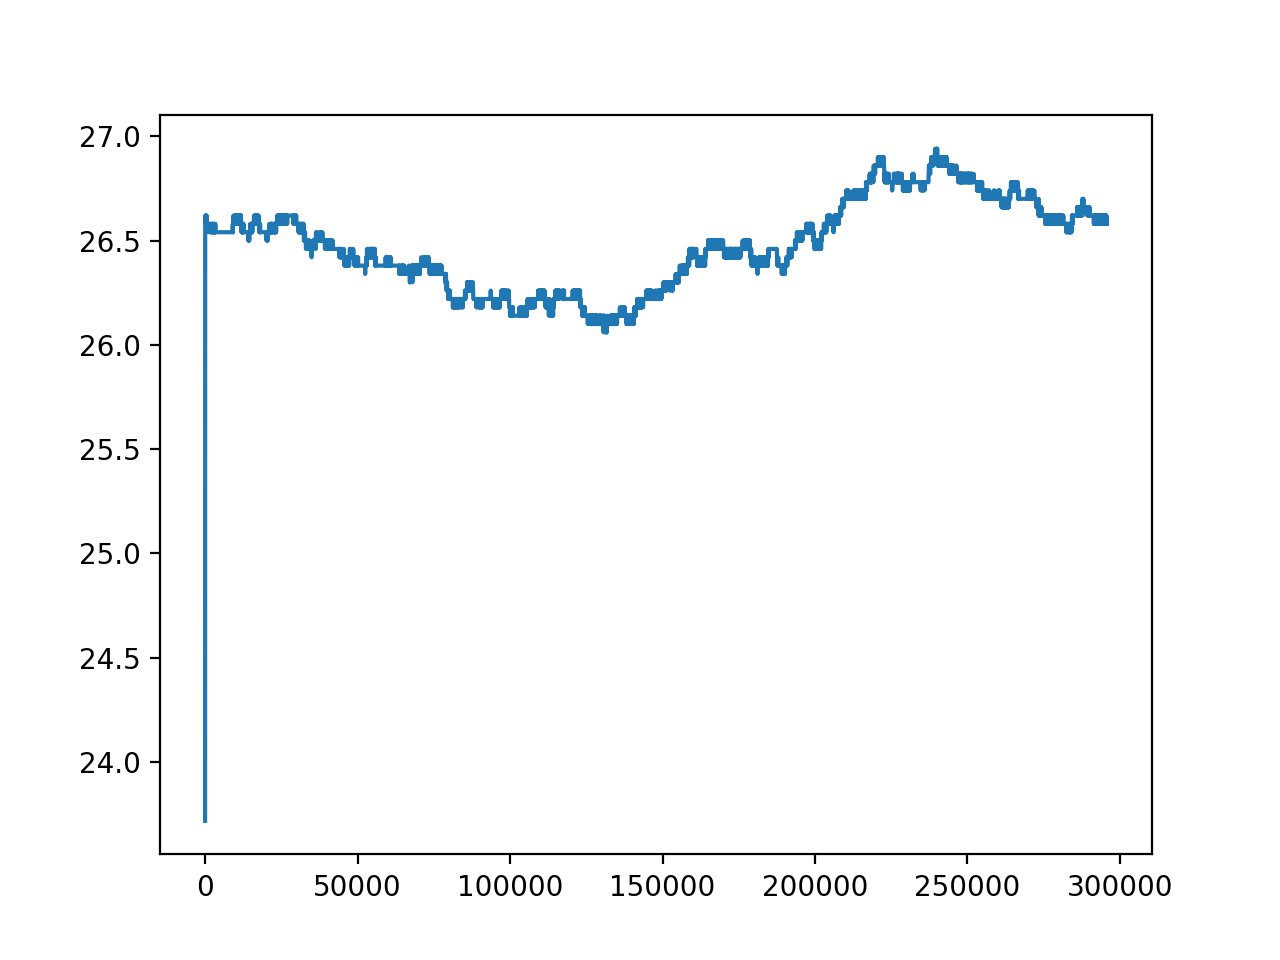

In [114]:
data['Temperature (C)'].plot()
plt.show()

<IPython.core.display.Javascript object>


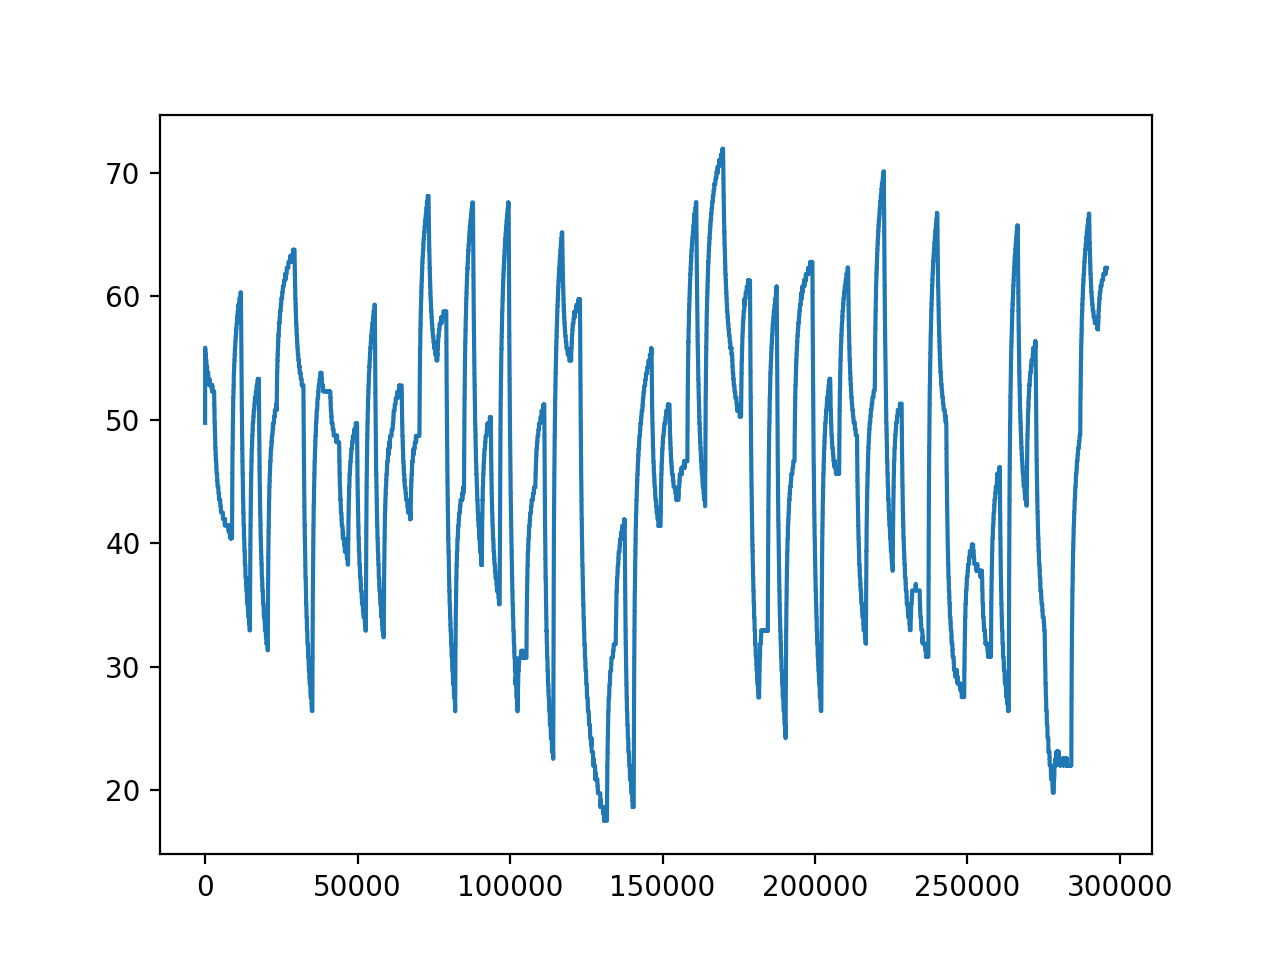

In [115]:
plt.figure(2)
data['Humidity (%r.h.)'].plot()
plt.show()

In [116]:
data.shape

(295719, 20)

In [118]:
data.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

## Create the train, validation and test datasets

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
X = data.iloc[:, 3:]
y = data.iloc[:, 2]

In [217]:
X.head()

,Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


In [218]:
y.head()

0    49.7534
1    55.8400
2    55.8400
3    55.8400
4    55.8400
Name: Humidity (%r.h.), dtype: float64

In [219]:
# Convert the dataframes to numpy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)

X.shape, y.shape

((295719, 17), (295719, 1))

In [220]:
# Standardize the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(X)
scaler_y.fit(y)

X = scaler_x.transform(X)
y = scaler_y.transform(y)

In [221]:
data.shape[0]/30

9857.3

In [222]:
timesteps = 3  # 1 seconds for each window
n_features = X.shape[1]
print("Number of features: ", n_features)

# Shape the data for the RNN model
X = X.reshape(-1, timesteps, n_features)
y = y.reshape(-1, timesteps, 1)

Number of features:  17


In [223]:
X.shape

(98573, 3, 17)

In [224]:
X[:1, :2, :]

array([[[-13.03104066,  -3.42438394,   1.88457783,  -0.65893467,
          -0.62891703,  -0.73474637,  -1.15587603,  -1.1171574 ,
          -1.00329612,  -1.07576351,  -1.30685586,  -1.23653093,
          -1.15250838,  -1.16994908,  -1.07331778,  -0.90339357,
          -0.89360022],
        [  0.67857909,   0.86759243,  -0.499173  ,  -0.5736214 ,
          -0.45184417,  -0.43478104,  -0.79622147,  -0.80999411,
          -0.66803834,  -0.65389481,  -0.19959648,  -0.31806464,
          -0.04677659,   0.19878614,   0.54082725,   0.59629056,
           0.64401782]]])

In [225]:
y.shape

(98573, 3, 1)

In [226]:
y[0]

array([[0.30752017],
       [0.80172814],
       [0.80172814]])

In [147]:
0.7*X.shape[0]

69001.09999999999

In [227]:
# Split the reshaped data in to train, validation and test datasets
X_train, y_train = X[:70000], y[:70000]
X_valid, y_valid = X[70000:80000], y[70000:80000]
X_test, y_test = X[80000:], y[80000:]

In [237]:
np.random.seed(42)
tf.random.set_seed(42)

# Build the model
model = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[None, n_features]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dense(1)
])

def last_timestep_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

model.compile(loss='mean_squared_error',
             metrics=[last_timestep_mse],
             optimizer='adam')
history = model.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   epochs=20)

Train on 70000 samples, validate on 10000 samples
Epoch 1/20
70000/70000 [==============================] - 24s 340us/sample - loss: 0.3159 - last_timestep_mse: 0.2920 - val_loss: 0.5491 - val_last_timestep_mse: 0.5727
Epoch 2/20
70000/70000 [==============================] - 19s 278us/sample - loss: 0.2317 - last_timestep_mse: 0.2180 - val_loss: 0.7217 - val_last_timestep_mse: 0.6650
Epoch 3/20
70000/70000 [==============================] - 19s 264us/sample - loss: 0.2143 - last_timestep_mse: 0.2014 - val_loss: 0.6386 - val_last_timestep_mse: 0.6578
Epoch 4/20
70000/70000 [==============================] - 18s 263us/sample - loss: 0.2033 - last_timestep_mse: 0.1889 - val_loss: 0.9139 - val_last_timestep_mse: 0.8746
Epoch 5/20
70000/70000 [==============================] - 19s 266us/sample - loss: 0.1900 - last_timestep_mse: 0.1767 - val_loss: 0.7880 - val_last_timestep_mse: 0.7476
Epoch 6/20
70000/70000 [==============================] - 18s 264us/sample - loss: 0.1811 - last_timestep

In [238]:
y_pred = model.predict(X_test)

In [239]:
y_pred.shape

(18573, 3, 1)

In [240]:
y_test.shape

(18573, 3, 1)

In [241]:
y_test[:, -1, :].shape

(18573, 1)

In [242]:
np.mean(keras.losses.mean_squared_error(y_test[:, -1, :], y_pred[:, -1, :]))

1.1657591

In [172]:
y_pred[:10]

array([[[38.263557],
        [47.995125],
        [49.483223]],

       [[38.263557],
        [47.99513 ],
        [49.483223]],

       [[38.263557],
        [47.995125],
        [49.483223]],

       [[38.26354 ],
        [47.995125],
        [49.483223]],

       [[38.263542],
        [47.995125],
        [49.483223]],

       [[38.263542],
        [47.995125],
        [49.48322 ]],

       [[38.263542],
        [47.995125],
        [49.48322 ]],

       [[38.263542],
        [47.995125],
        [49.48322 ]],

       [[38.263557],
        [47.995125],
        [49.483223]],

       [[38.263557],
        [47.99513 ],
        [49.483223]]], dtype=float32)

<IPython.core.display.Javascript object>


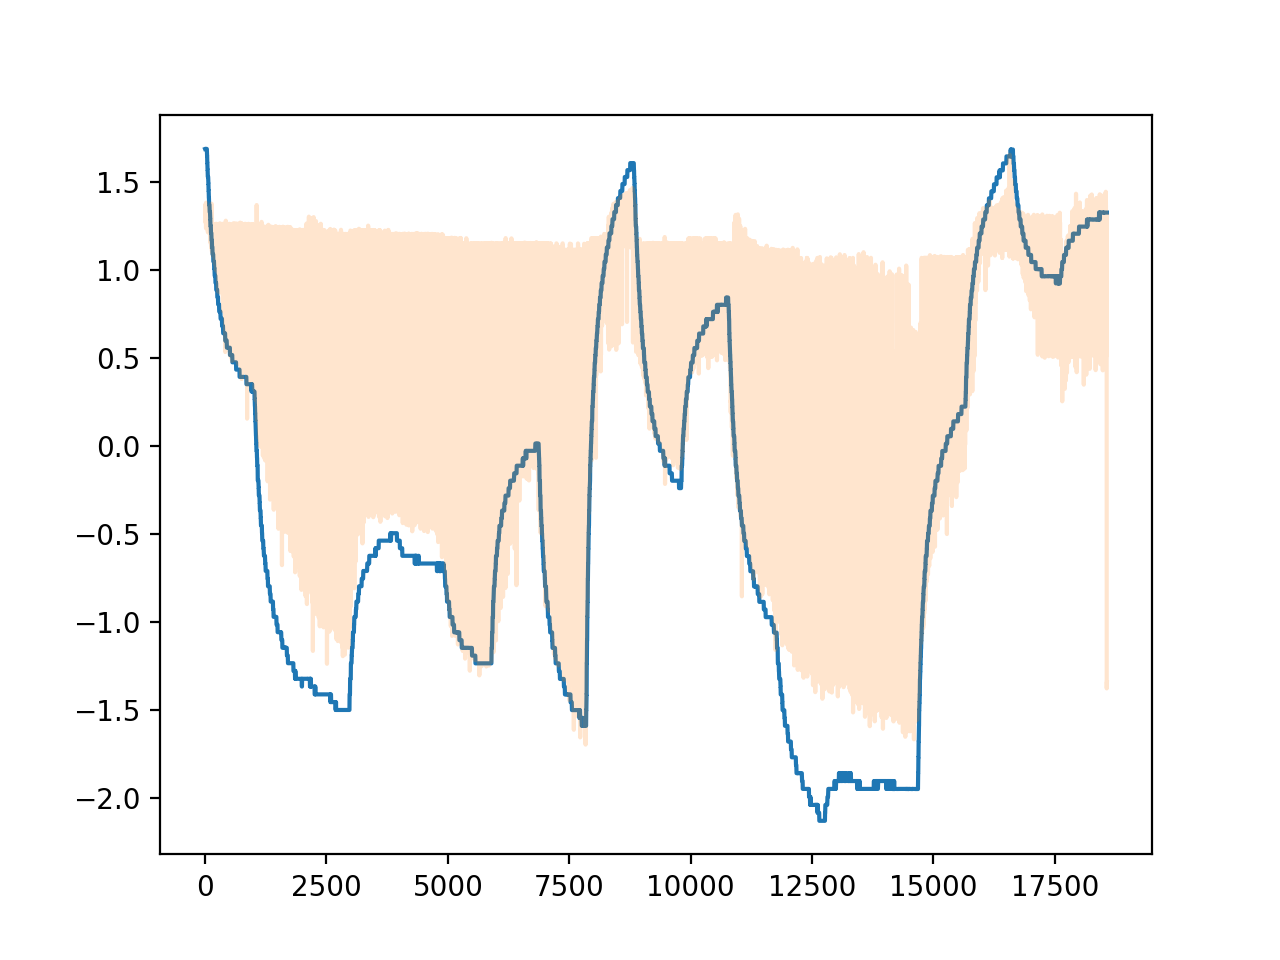

In [243]:
plt.figure(3)
plt.plot(y_test[:, -1, :])
plt.plot(y_pred[:, -1, :], alpha=0.2)
plt.show()

In [244]:
y_test[:10, -1, :]

array([[1.6875772 ],
       [1.6875772 ],
       [1.6875772 ],
       [1.6875772 ],
       [1.6875772 ],
       [1.6881131 ],
       [1.68838916],
       [1.68838916],
       [1.68838916],
       [1.68838916]])

In [245]:
y_pred[:10, -1, :]

array([[1.3656532],
       [1.3323107],
       [1.3180357],
       [1.3176613],
       [1.3181844],
       [1.3232601],
       [1.3258672],
       [1.338364 ],
       [1.3439505],
       [1.2972246]], dtype=float32)

In [246]:
y_train_pred = model.predict(X_train)

plt.figure(5)
plt.plot(y_train[:, -1, :])
plt.plot(y_train_pred[:, -1, :], alpha=0.2)
plt.show()

<IPython.core.display.Javascript object>


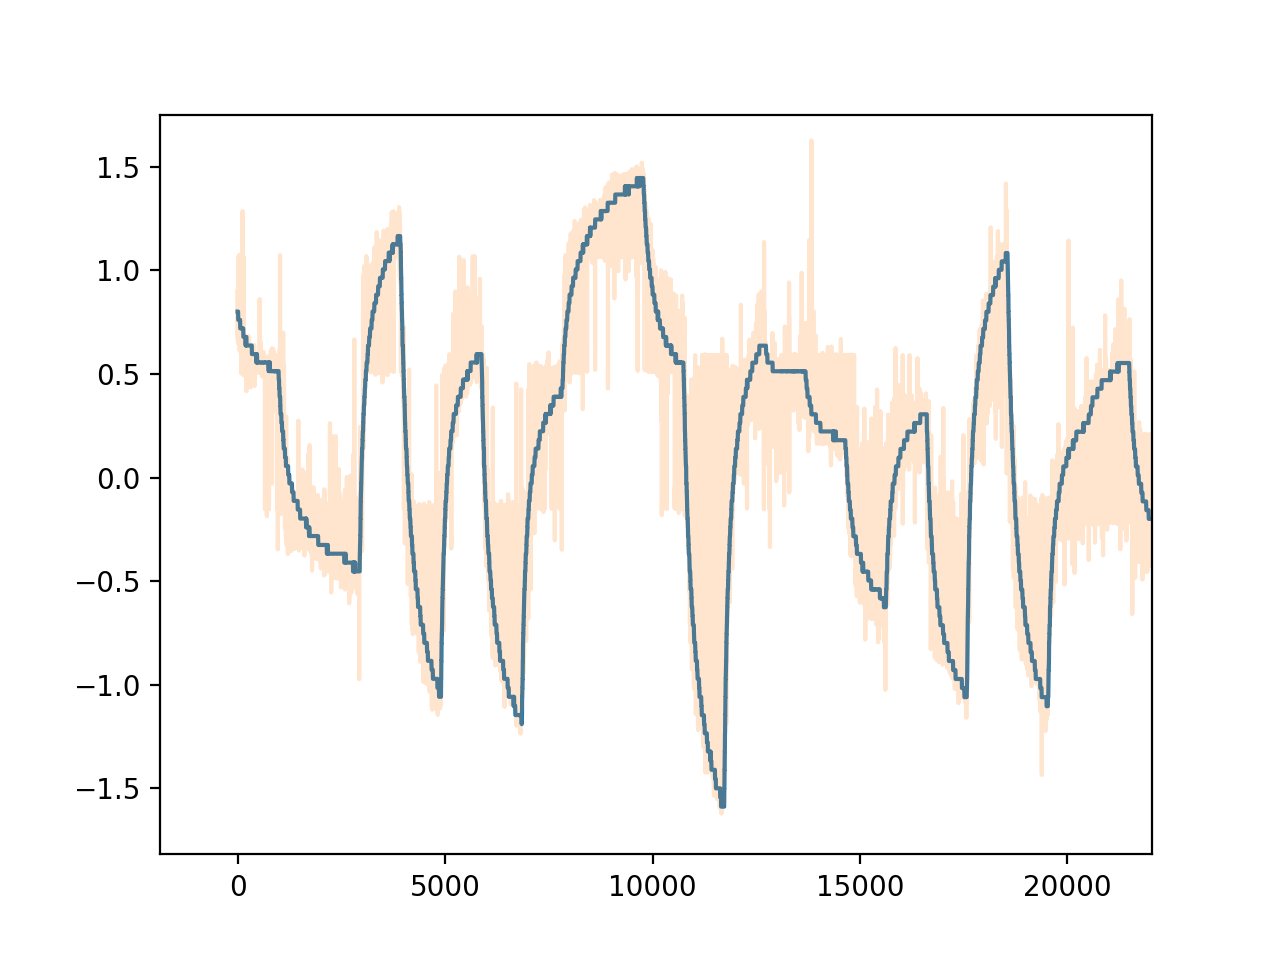

<IPython.core.display.Javascript object>


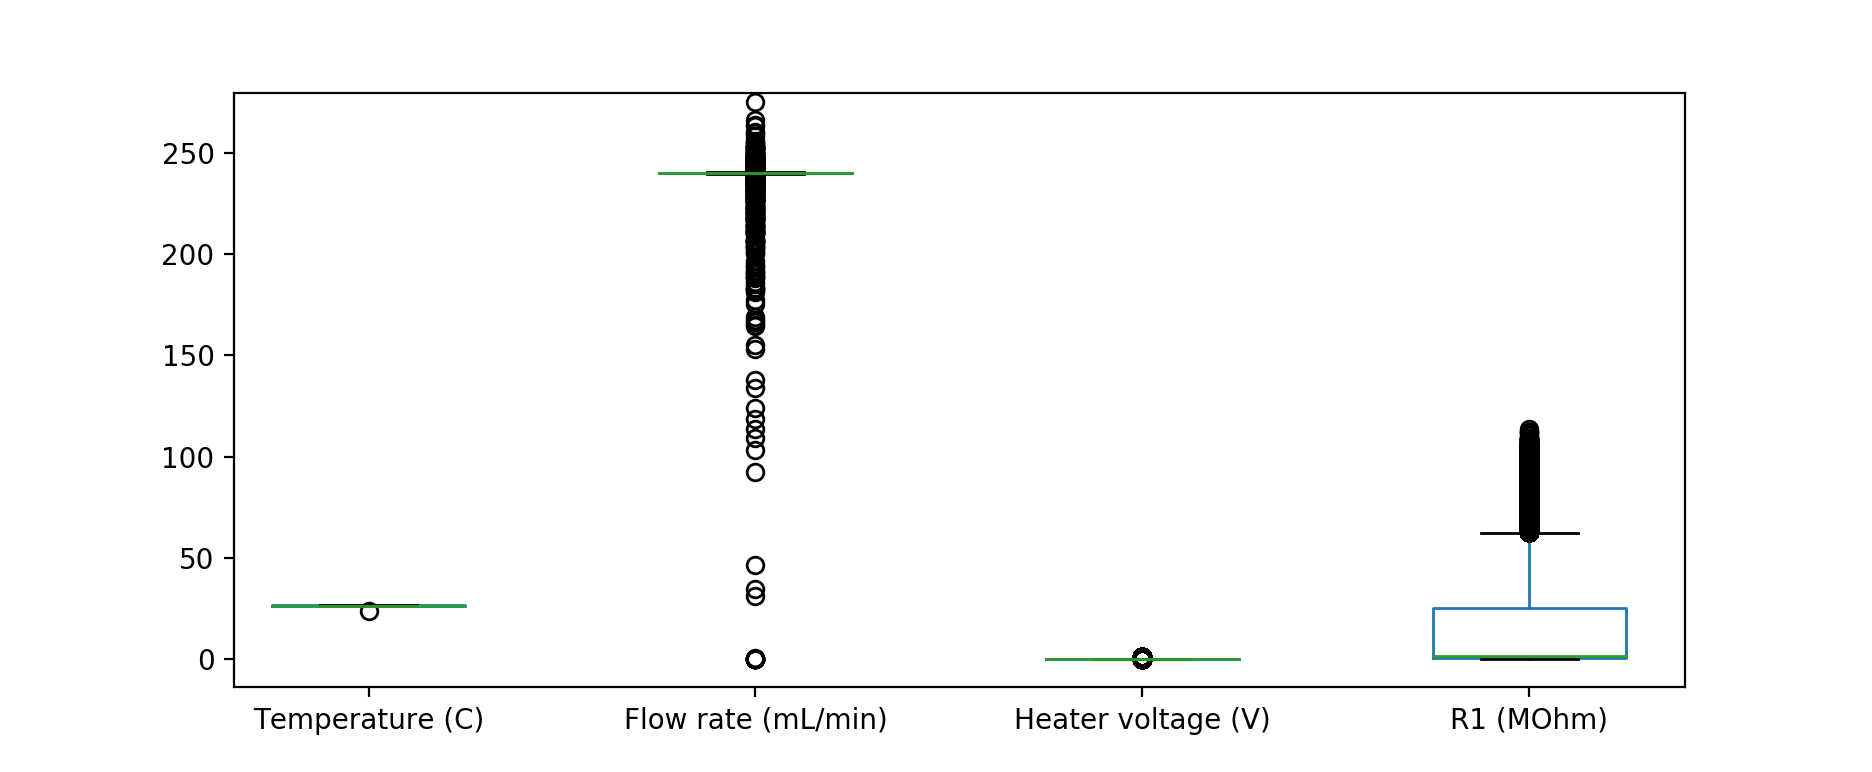

In [212]:
plt.figure(5)
data.iloc[:, 3:].plot.box()
plt.show()

In [249]:
a = np.random.rand(10, 3)

In [250]:
a.shape

(10, 3)

In [251]:
a

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [252]:
a = a.reshape(-1, 2, 3)

In [253]:
a

array([[[0.37454012, 0.95071431, 0.73199394],
        [0.59865848, 0.15601864, 0.15599452]],

       [[0.05808361, 0.86617615, 0.60111501],
        [0.70807258, 0.02058449, 0.96990985]],

       [[0.83244264, 0.21233911, 0.18182497],
        [0.18340451, 0.30424224, 0.52475643]],

       [[0.43194502, 0.29122914, 0.61185289],
        [0.13949386, 0.29214465, 0.36636184]],

       [[0.45606998, 0.78517596, 0.19967378],
        [0.51423444, 0.59241457, 0.04645041]]])

In [255]:
np.random.shuffle(a)

In [256]:
a

array([[[0.05808361, 0.86617615, 0.60111501],
        [0.70807258, 0.02058449, 0.96990985]],

       [[0.43194502, 0.29122914, 0.61185289],
        [0.13949386, 0.29214465, 0.36636184]],

       [[0.37454012, 0.95071431, 0.73199394],
        [0.59865848, 0.15601864, 0.15599452]],

       [[0.45606998, 0.78517596, 0.19967378],
        [0.51423444, 0.59241457, 0.04645041]],

       [[0.83244264, 0.21233911, 0.18182497],
        [0.18340451, 0.30424224, 0.52475643]]])

Numpy `shuffle()` shuffles the numpy array in place. Hence, it does the return type is `None`.

NameError: name 'df3' is not defined